In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

## Movimento Browniano

Movimento browniano:
É uma variável aleatóra $W(t)$ que depende de $t \in [0,T]$ continuamente e satisfaz as 03 condições a seguir:

1. $W(0)=0$ (com probabilidade 1)
2. Para $0 \leq s < t \leq T$ a variável aleatória dada pelo incremento $W(t) - W(s)$ tem distribuição normal com média zero e variancia $t-s$. De forma equivalente, $W(t) - W(s) \sim \sqrt{t-s}N(0,1)$
3. Para $0 \leq s < t < u < v \leq T$ os incrementos $W(t) - W(s)$ e $W(v) - W(u)$ são independentes.

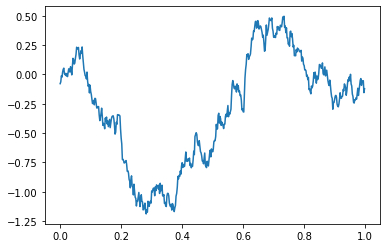

In [14]:
np.random.seed(100)
T=1
N=500
dt=T/N

dW = math.sqrt(dt)*np.random.randn(500)
W = np.cumsum(dW)
x = np.arange(0, T, dt)

plt.plot(x, W)
plt.show()

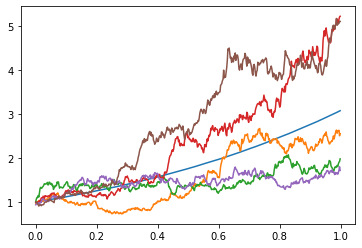

0.014893707152006552


In [15]:
np.random.seed(100)
T=1
N=500
M=15000
dt=T/N
t = np.arange(0, T, dt)

dW = math.sqrt(dt)*np.random.randn(M,N)
W = np.cumsum(dW,axis=1)
U = np.exp(np.tile(t,(M,1)) + 0.5*W)
Umean = np.mean(U,axis=0)

plt.plot(t, Umean)
plt.plot(t, U[0])
plt.plot(t, U[1])
plt.plot(t, U[2])
plt.plot(t, U[3])
plt.plot(t, U[4])
plt.show()

averr = np.linalg.norm(Umean - np.exp(9*t/8),ord=np.inf)
print(averr)

## Integral Estocástica

A soma na forma $\sum_{j=0}^{N-1} = h(t_j)(W(t_{j+1}) - W(t_j)$ pode ser considerada comu uma aproximação para a integral estocástica $\int_0^T h(t)dW(t)$. Aqui estamos integrando $h$ com respeito ao movimento Browniano.

In [16]:
np.random.seed(100)
T=1
N=500
M=15000
dt=T/N
t = np.arange(0, T, dt)

dW = math.sqrt(dt)*np.random.randn(N)
W = np.insert(np.cumsum(dW),0,0.,axis=0)

ito = np.sum(np.multiply(W[0:len(W)-1],dW))
strat = np.sum(np.multiply(0.5*(W[0:len(W)-1]+W[1:len(W)]) + 0.5*math.sqrt(dt)*np.random.randn(N),dW))

itoerr = abs(ito - 0.5*(W[len(W)-1]**2-T))
straterr = abs(strat - 0.5*W[len(W)-1]**2)

print(itoerr)
print(straterr)

0.03335333208601421
0.024885667879344098


## Método de Euler-Maruyama

Uma SDE autônoma e escalar pode ser escrita na forma integral como:

$X(t) = X_0 + \int_0^t f(X(s))ds + \int_0^t g(X(s))dW(s), 0 \leq t \leq T.$

$dX(t) = f(X(t))dt + g(X(t))dW(t), X(0) = X_0, 0\leq t \leq T$

$X_j = X_{j-1} + f(X_{j-1})\Delta t + g(X_{j-1})(W(\tau_j)-W(\tau_{j-1}))$

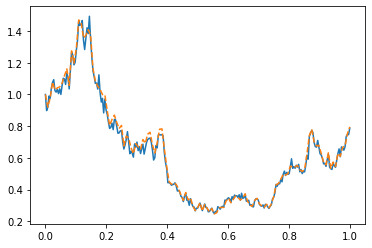

0.007425194193212747


In [20]:
np.random.seed(100)
lbd = 1
mu = 1
Xzero = 1
T = 1
N = 2**8
dt = 1/N

dW = math.sqrt(dt)*np.random.randn(N)
W = np.cumsum(dW)
t = np.arange(dt,T+dt,dt)

Xtrue = Xzero*np.exp((lbd-0.5*mu**2)*np.arange(dt,T+dt,dt)+mu*W)

plt.plot(np.arange(0,T+dt,dt),np.insert(Xtrue,0,Xzero,axis=0))

R = 2
Dt = R*dt
L=N/R
Xem = np.zeros(int(L))
Xtemp = Xzero
for j in range(0,int(L)):
    Winc = np.sum(dW[R*j:R*(j+1)])
    Xtemp = Xtemp + Dt*lbd*Xtemp + mu*Xtemp*Winc
    Xem[j] = Xtemp

plt.plot(np.arange(0,T+Dt,Dt),np.insert(Xem,0,Xzero,axis=0), linestyle='dashed')

plt.show()

emerr = abs(Xem[-1] - Xtrue[-1])
print(emerr)

## Convergencia forte e fraca do método Euler Maruyama

Um método tem ordem de convergência forte igual a $\gamma$ se existe uma constante $C$ tal que

$E|X_n - X(\tau)| \leq C\Delta t^\gamma$ 

para qualquer $\tau = n\Delta t \in [0,T]$ e $\Delta t$ suficientemente pequeno.

Pode ser demonstrado que EM tem ordem de convergência forte $\gamma = 1/2$. Estamos focando no erro do EM no ponto final $t=T$ e então temos:

$e_{\Delta t}^{forte} := E|X_L - X(T)| \leq C \Delta t^{1/2}$ , onde $L\Delta t = T$

In [17]:
lbd = 2
mu = 1
Xzero = 1
T = 1
N = 2**9
dt = T/N
M = 1000

np.random.seed(100)

Xerr = np.zeros((M,5))
for s in range(M):
    dW = math.sqrt(dt)*np.random.randn(N)
    W = np.cumsum(dW)
    Xtrue = Xzero*np.exp((lbd-0.5*mu**2)+mu*W[-1])
    for p in range(5):
        R = 2**(p)
        Dt = R*dt
        L = N/R
        Xtemp = Xzero
        for j in range(int(L)):
            Winc = np.sum(dW[R*j:R*(j+1)])
            Xtemp = Xtemp + lbd*Xtemp*Dt + mu*Xtemp*Winc
        Xerr[s,p] = abs(Xtemp-Xtrue)

(0.001, 0.1, 0.0001, 1.0)

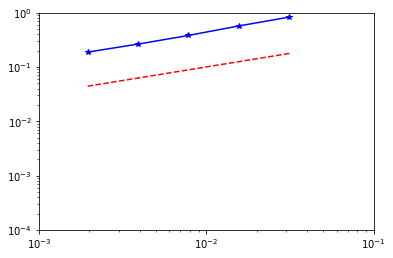

In [18]:
Dtvals = dt*(2.**(np.arange(0,5,1)))
plt.loglog(Dtvals, np.mean(Xerr,axis=0), 'b*-')
plt.loglog(Dtvals, (Dtvals)**0.5, 'r--')
plt.axis([1e-3, 1e-1, 1e-4, 1])

In [190]:
A = np.vstack([np.ones(len(Dtvals)),np.log(Dtvals)]).T
rhs = np.log(np.mean(Xerr,axis=0))[np.newaxis].T
sol = np.linalg.lstsq(A,rhs,rcond=None)[0]
C = sol[0,0]
q = sol[1,0]
resid = np.linalg.norm(A.dot(sol) - rhs)
print(q)
print(resid)

0.53849735363824
0.03442424920481489


Um método tem ordem de convergência fraca igual a $\gamma$ se existe uma constante $C$ tal que para todas as funções $p$ em algumas classes (suavidade e condições de cresccimento polinomial):

$|\mathbf{E}p(X_n) - \mathbf{E}p(X(\tau)| \leq C\Delta t^\gamma$

para qualquer $\tau = n \Delta t \in [0,T]$ fixado e $\Delta t$ suficientemente pequeno.

Pode ser demonstrado que EM tem ordem de convergencia fraca $\gamma=1$.

$e_{\Delta t}^{fraca} := |\mathbf{E}_L - \mathbf{E}X(T)| \leq C\Delta t$, onde $L\Delta t = T$, para $p(X) = X$ com $\gamma = 1$

In [20]:
np.random.seed(100)

lbd = 2
mu = 0.1
Xzero = 1
T = 1
M = 50000

Xem = np.zeros((5,1))
for p in range(5):
    Dt = 2**(p-9)
    L = T/Dt
    Xtemp = Xzero*np.ones((M,1))
    for j in range(int(L)):
        Winc = np.sqrt(Dt)*np.random.randn(M,1)
        Xtemp = Xtemp + Dt*lbd*Xtemp + mu*Xtemp*Winc
    Xem[p] = np.mean(Xtemp)
Xerr = abs(Xem - np.exp(lbd))

2.425868612948065
0.9475036539340486
0.13958777814687556


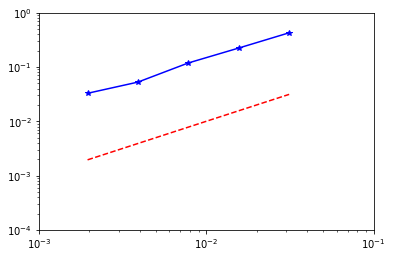

In [31]:
Dtvals = 2.**(np.arange(0,5,1)-9)
plt.loglog(Dtvals, Xerr, 'b*-')
plt.loglog(Dtvals, Dtvals, 'r--')
plt.axis([1e-3, 1e-1, 1e-4, 1])

A = np.vstack([np.ones(len(Dtvals)), np.log(Dtvals)]).T
rhs = np.log(Xerr)
sol = np.linalg.lstsq(A,rhs,rcond=None)[0]
C = sol[0,0]
q = sol[1,0]
resid = np.linalg.norm(A.dot(sol) - rhs)
print(C)
print(q)
print(resid)

## Método de ordem superior de Milstein

Incrementa a ordem de convergência forte do método de EM para 1. A correção surge porque a expansão de Taylor tradicional deve ser modificada no caso do cálculo de Itô. Truncando a expansão Itô-Taylor em um número apropriado de pontos produz o método de Milstein.

$$
\begin{aligned}
 X_j= & X_{j-1} + \Delta t f(X_{j-1}) + g(X_{j-1})\big(W(\tau_j) - W(\tau_{j-1})\big) + \\
      & \frac{1}{2} g(X_{j-1})g'(x_{j-1})\big((W(\tau_j) - W(\tau_j-1)\big)^2 - \Delta t), j = 1,2,\dots,L 
\end{aligned}
$$

In [134]:
np.random.seed(100)
r = 2
K = 1
beta = 0.25
Xzero = 0.5
T = 1
N = 2**11
dt = T/N
M = 500
R = np.array([1, 16, 32, 64, 128])

dW = np.sqrt(dt)*np.random.randn(M,N)
Xmil = np.zeros((M,5))

for p in range(5):
    Dt = R[p]*dt
    L = N/R[p]
    Xtemp = Xzero*np.ones((M,1))
    for j in range(int(L)):
        Winc = np.sum(dW[:,R[p]*j:R[p]*(j+1)],axis=1,keepdims=True)
        Xtemp = Xtemp + Dt*r*Xtemp*(K-Xtemp) + beta*Xtemp*Winc + 0.5*beta**2*Xtemp*(Winc**2 - Dt)
    Xmil[:,p] = Xtemp[:,0]

Xref = Xmil[:,0][np.newaxis].T
Xerr = abs(Xmil[:,1:5]) - np.tile(Xref,(1,4))

-2.2718673486881586
1.0445986438040278
0.018982382981789964


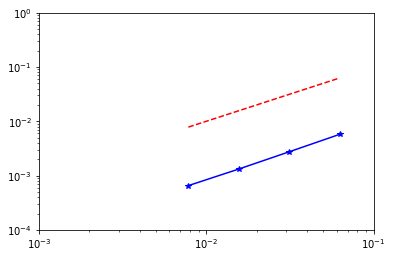

In [136]:
Dtvals = dt*R[1:5]
plt.loglog(Dtvals,np.mean(Xerr,axis=0), 'b*-')
plt.loglog(Dtvals,Dtvals,'r--')
plt.axis([1e-3, 1e-1, 1e-4, 1])
A = np.vstack([np.ones(len(Dtvals)), np.log(Dtvals)]).T
rhs = np.log(np.mean(Xerr,axis=0)[np.newaxis].T)
sol = np.linalg.lstsq(A,rhs,rcond=None)[0]
C = sol[0,0]
q = sol[1,0]
resid = np.linalg.norm(A.dot(sol) - rhs)
print(C)
print(q)
print(resid)

## Estabilidade linear

### Estabilidade de média do quadrado

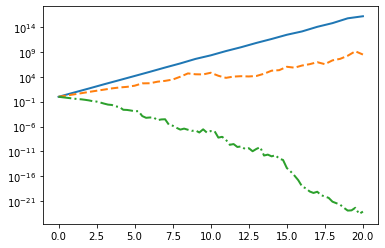

In [35]:
np.random.seed(100)

T = 20
M = 50000
Xzero = 1
ltype = ['-','--','-.']

lbd = -3
mu = 3**0.5

for k in range(3):
    Dt = 2**(-k)
    N = int(T/Dt)
    Xms = np.zeros(N)
    Xtemp = Xzero*np.ones(M)
    for j in range(int(N)):
        Winc = np.sqrt(Dt)*np.random.randn(M)
        Xtemp = Xtemp + Dt*lbd*Xtemp + mu*Xtemp*Winc
        Xms[j] = np.mean(Xtemp**2)
    plt.semilogy(np.arange(0,T+Dt,Dt),np.insert(Xms,0,Xzero,axis=0),linewidth=2,linestyle=ltype[k])

### Estabilidade asintótica

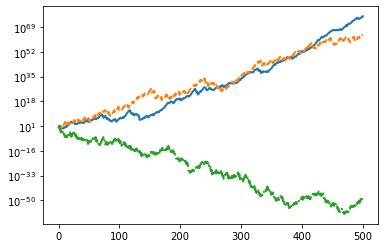

In [38]:
T = 500
lbd = 0.5
mu = 6**0.5

for k in range(3):
    Dt = 2**(-k)
    N = int(T/Dt)
    Xemabs = np.zeros(N)
    Xtemp = Xzero
    for j in range(N):
        Winc = np.sqrt(Dt)*np.random.randn()
        Xtemp = Xtemp + Dt*lbd*Xtemp + mu*Xtemp*Winc
        Xemabs[j] = abs(Xtemp)
    plt.semilogy(np.arange(0,T+Dt,Dt),np.insert(Xemabs,0,Xzero,axis=0),linewidth=2,linestyle=ltype[k])